<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/App_Prediction_GeekLurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [53]:
dataset = pd.read_csv('/content/drive/MyDrive/GeekLurn_Resume_Projects/Customer App Prediction/appdata10.csv')

In [54]:
dataset.shape

(50000, 12)

In [55]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [56]:
dataset.isna().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [57]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [58]:
dataset.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [59]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [60]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


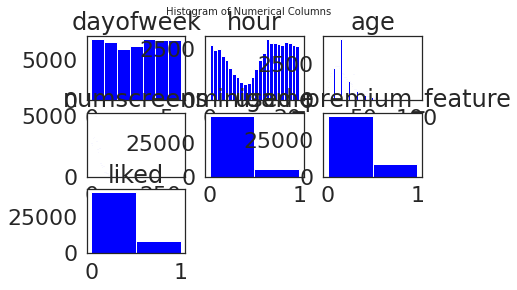

In [61]:
plt.suptitle('Histogram of Numerical Columns', fontsize = 10)
for i in range(1, dataset2.shape[1]+ 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins = vals, color = 'blue')

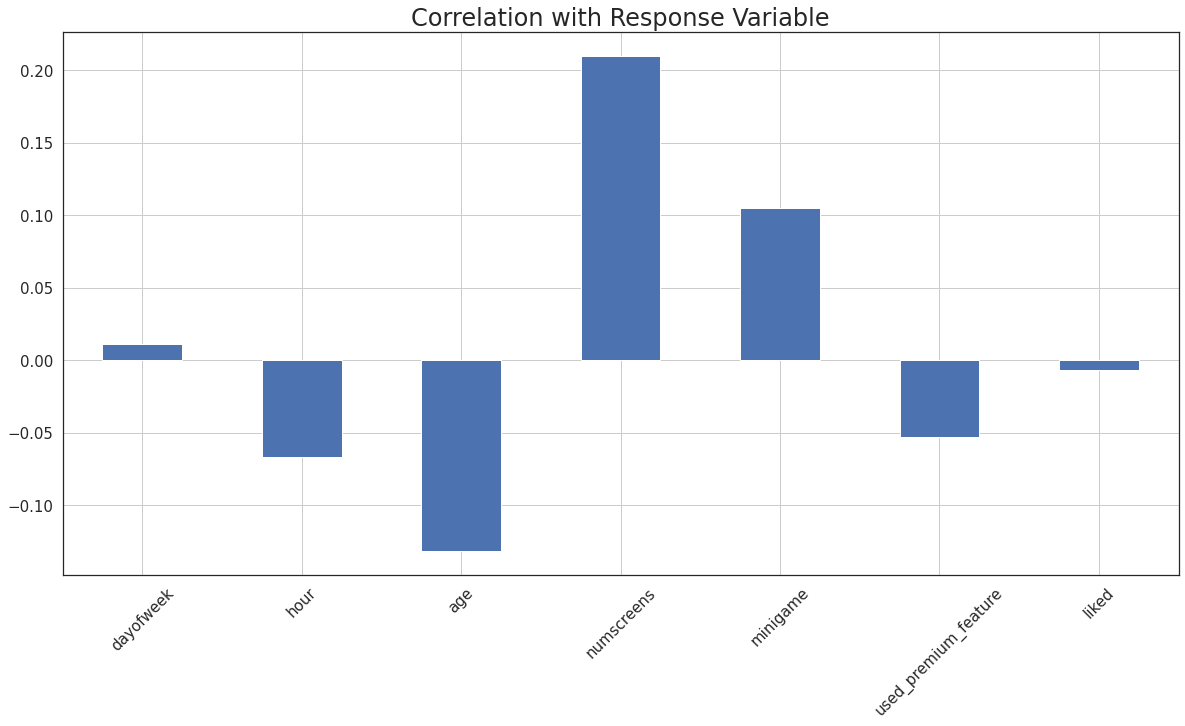

In [62]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20, 10),
                  title = 'Correlation with Response Variable',
                  fontsize = 15, rot = 45,
                  grid = True)


In [63]:
sns.set(style = 'white', font_scale = 2)

In [64]:
corr = dataset2.corr()

In [65]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

Text(0.5, 0.98, 'Correlation Matrix')

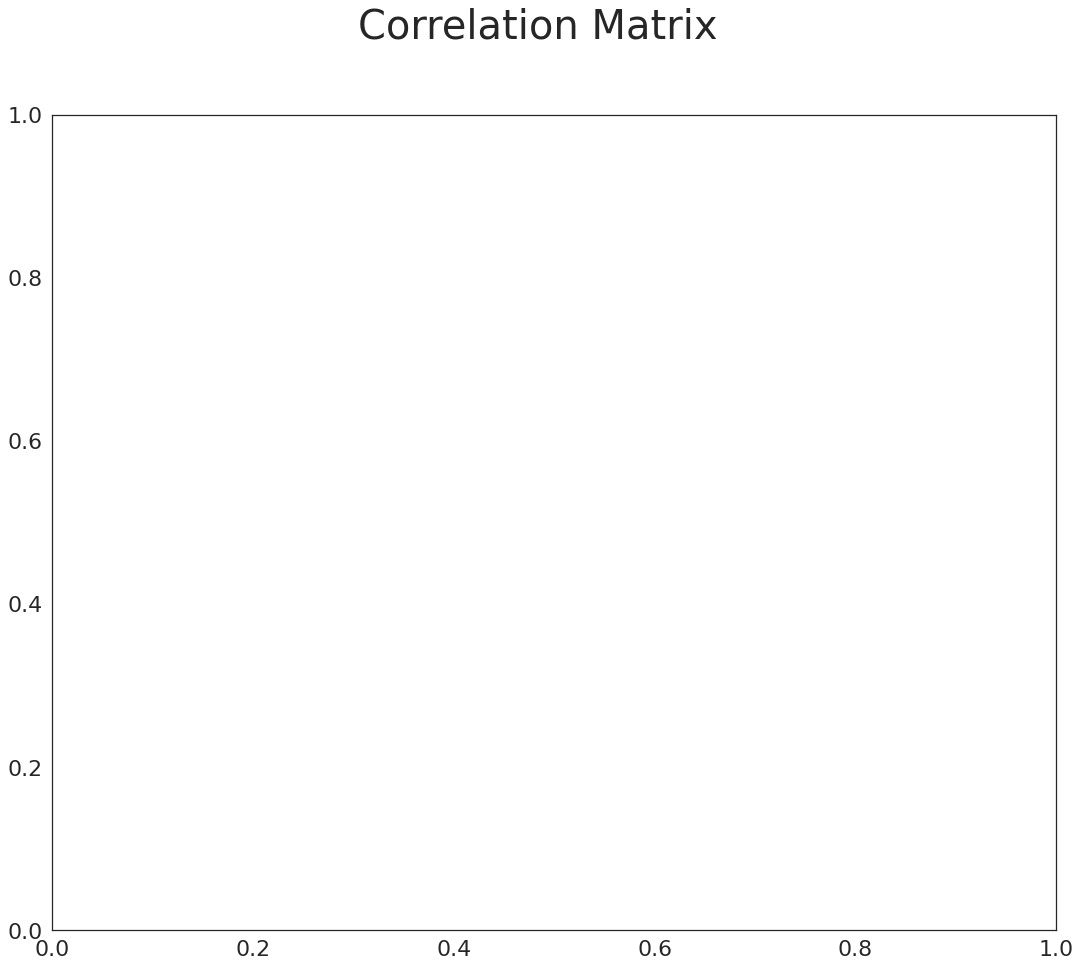

In [66]:
f, ax = plt.subplots(figsize = (18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

In [67]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)

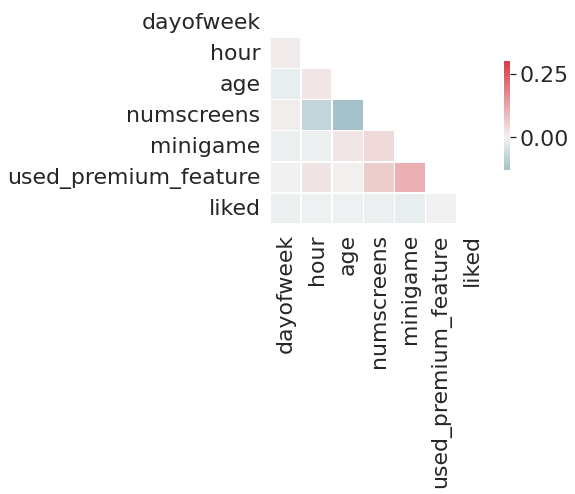

In [68]:
sns.heatmap(corr, mask=mask, cmap = cmap, vmax = 0.3, center = 0, 
            square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

In [69]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [70]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [71]:
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset["enrolled_date"]]

In [72]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [73]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

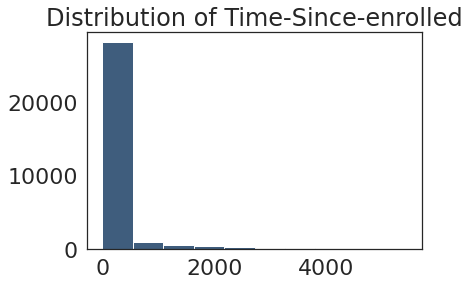

In [74]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D')
plt.title('Distribution of Time-Since-enrolled')
plt.show()

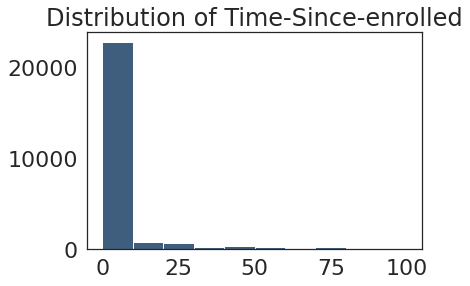

In [75]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D', range = [0,100])
plt.title('Distribution of Time-Since-enrolled')
plt.show()

In [76]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [77]:
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [78]:
top_screens = pd.read_csv('/content/drive/MyDrive/GeekLurn_Resume_Projects/Customer App Prediction/top_screens.csv').top_screens.values

In [79]:
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

In [80]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+",", "")
    
dataset["Other"] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns = ["screen_list"])

In [81]:
savings_screens = ["Saving1",
                   "Saving2",
                   "Saving2Amount",
                   "Saving4",
                   "Saving5",
                   "Saving6",
                   "Saving7",
                   "Saving8",
                   "Saving9",
                   "Saving10"]

In [82]:
dataset["SavingsCount"] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)

In [83]:
cm_screens = ["Credit1",
              "Credit2",
              "Credit3",
              "Credit3Container",
              "Credit3Dashboard"]

In [84]:
dataset["CMCount"] = dataset[cm_screens].sum(axis = 1)
dataset = dataset.drop(columns = cm_screens)

In [85]:
cc_screens = ["CC1",
              "CC1Category",
              "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis = 1)
dataset = dataset.drop(columns = cc_screens)


In [86]:
loan_screens = ["Loan",
                "Loan2",
                "Loan3",
                "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis = 1)
dataset = dataset.drop(columns = loan_screens)

In [87]:
dataset.to_csv("new_appdata20.csv", index = False)

In [88]:
import time

In [89]:
dataset = pd.read_csv('/content/drive/MyDrive/GeekLurn_Resume_Projects/Customer App Prediction/new_appdata10.csv')

In [90]:
y = dataset["enrolled"]
dataset = dataset.drop(columns = 'enrolled')

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.2, random_state = 0)

In [92]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = "user")
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [93]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [96]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_pred = classifier.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.7658930373360243

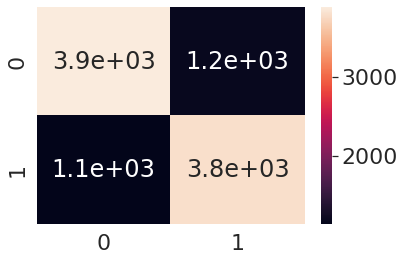

In [99]:
sns.heatmap(cm, annot = True)

In [100]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Accuracy: 0.767 (+/- 0.009)


In [101]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
